In [1]:
import gridftp_log_info
# for development purpose: automatic reload of code
%load_ext autoreload
%autoreload 2

## to_do: move to gridftp_log_info function
import requests
FREEGEOPIP_URL = 'http://freegeoip.net/json'
def get_geolocation_for_ip(ip):
    url = '{}/{}'.format(FREEGEOPIP_URL, ip)

    response = requests.get(url)
    response.raise_for_status()

    return response.json()

In [2]:
file_path = ("/home/stephan/Repos/DKRZ-gitlab/data-manager-1/Data/esg-server-usage-gridftp.log-full")
# format = YYYYMMDDHHMMSS

time_interval = [20160100000000,
                 20181000000000]

In [3]:
volumes, transfer_rates, client_ips, user_openids = gridftp_log_info.gridftplog_to_dict(file_path,time_interval,select="user")


Number of log entries processed: 8629


Transfer to:  Hamburg in Germany


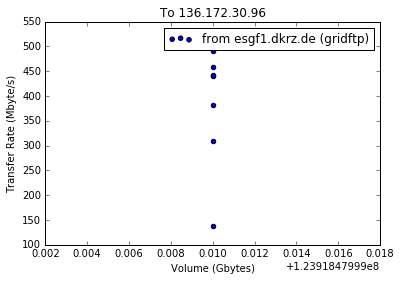

Transfer to:  Hamburg in Germany


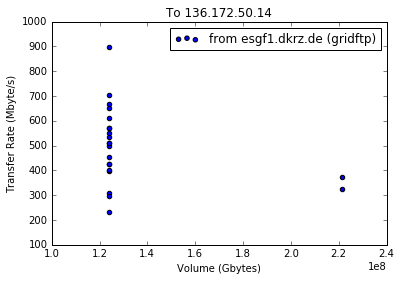

Transfer to:  Hamburg in Germany


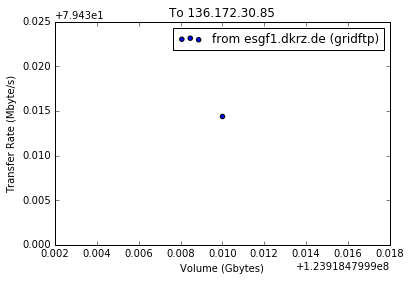

Transfer to:  Hamburg in Germany


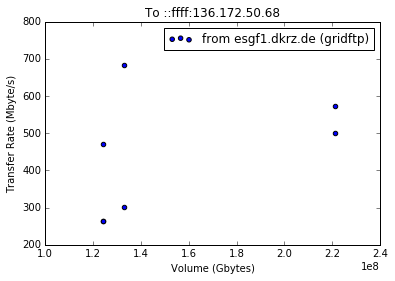

Transfer to:  Hamburg in Germany


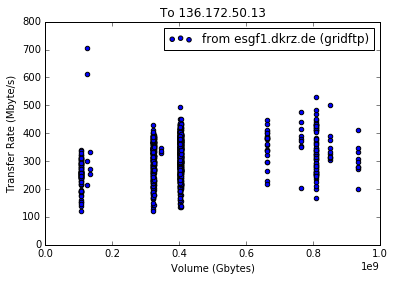

Transfer to:  Oxford in United Kingdom


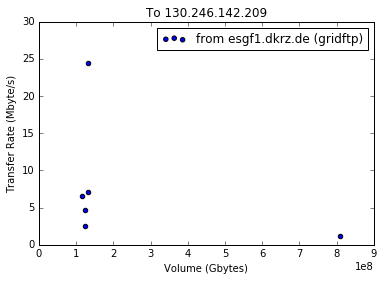

Transfer to:  Oxford in United Kingdom


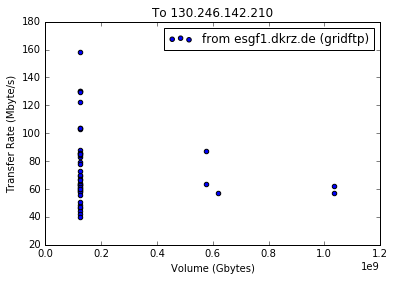

Transfer to:  Oxford in United Kingdom


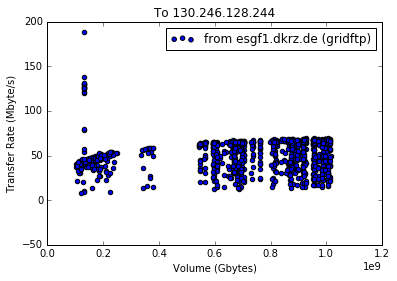

Transfer to:  Hamburg in Germany


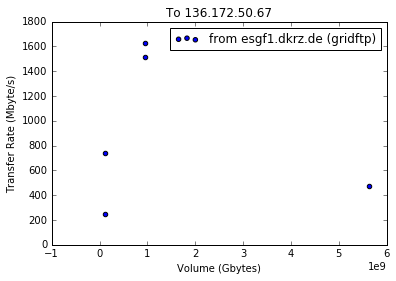

Transfer to:  Hamburg in Germany


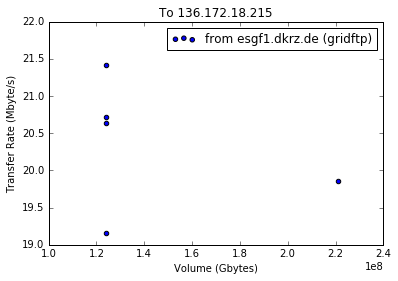

Transfer to:  Hamburg in Germany


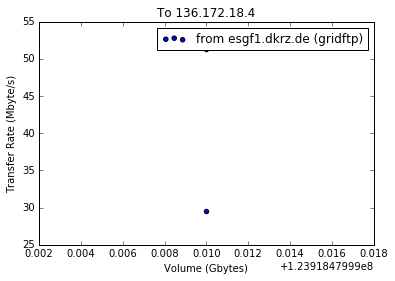

Transfer to:  Hamburg in Germany


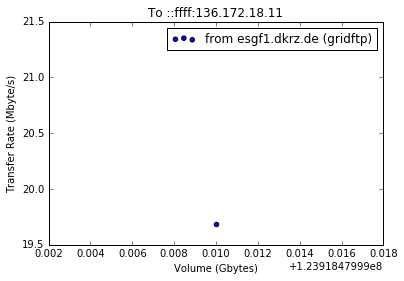

Transfer to:  Hamburg in Germany


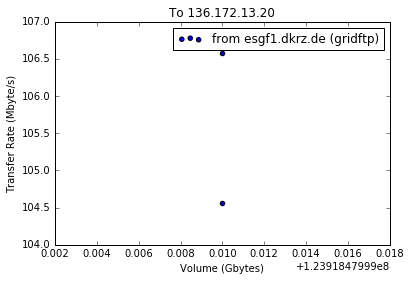

Transfer to:  Hamburg in Germany


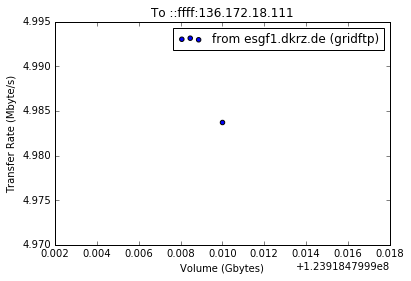

Transfer to:  Hamburg in Germany


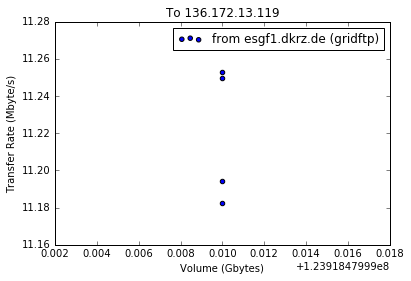

Transfer to:   in France


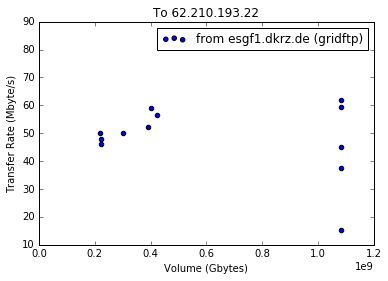

Transfer to:  Ashburn in United States


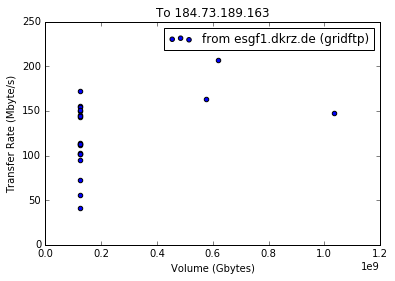

Error: No valid log entry for client ip 92.128.37.9
Error: No valid log entry for client ip 136.172.18.60
Transfer to:  Hamburg in Germany


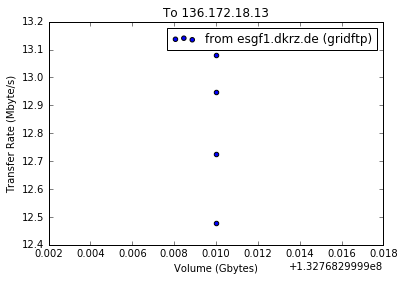

Transfer to:  Hamburg in Germany


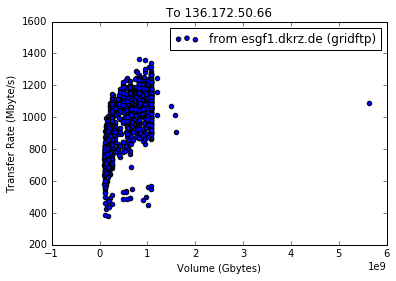

Error: No valid log entry for client ip 82.248.18.84
Error: No valid log entry for client ip 130.246.128.87
Transfer to:  Hamburg in Germany


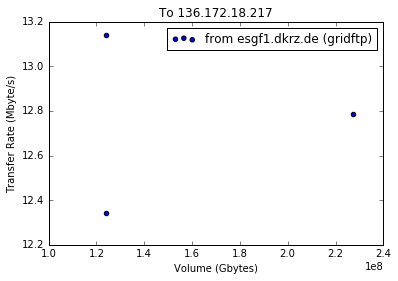

Error: No valid log entry for client ip 136.172.18.200
Transfer to:  Berkeley in United States


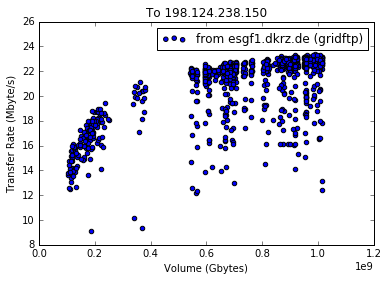

Error: No valid log entry for client ip e1l9i8d.a1r2t4
Transfer to:  Hamburg in Germany


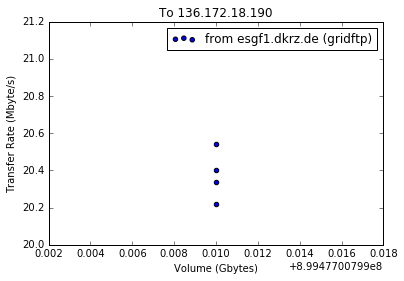

Transfer to:  Hamburg in Germany


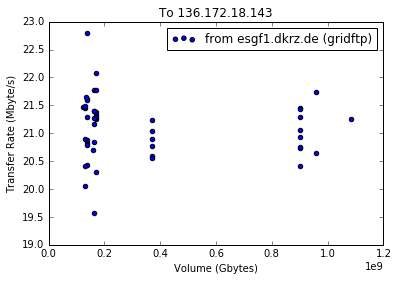

Transfer to:  Hamburg in Germany


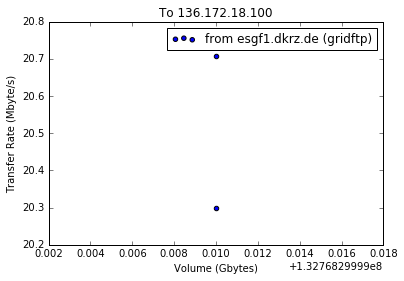

Error: No valid log entry for client ip 136.172.18.35
Transfer to:  unknown


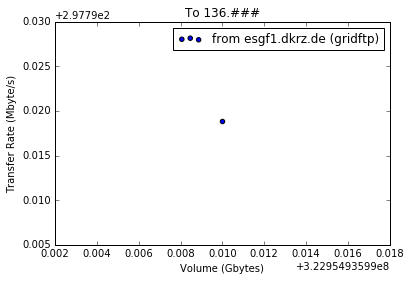

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

for client in client_ips:
   if client in volumes.keys():
       target = 'unknown'
       if len(client.split(".")) == 4:
          # assume valid ip
          geo_info = get_geolocation_for_ip(client)  
          target = geo_info['city']+" in "+geo_info['country_name']
       print "Transfer to: ",target
       plt.scatter(volumes[client],transfer_rates[client],label='from esgf1.dkrz.de (gridftp)')
       plt.xlabel('Volume (Gbytes)')
       plt.ylabel('Transfer Rate (Mbyte/s)') 
       plt.title("To "+client)
       plt.legend()
       plt.show()
   else:
    print "Error: No valid log entry for client ip",client

User:  https://esgf-data.dkrz.de/esgf-idp/openid/kbtest


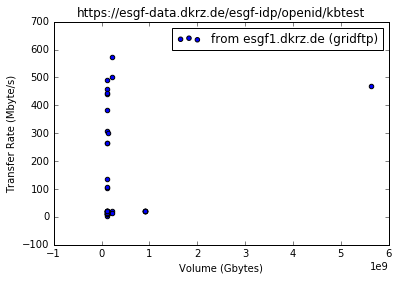

User:  https://esgf-data.dkrz.de/esgf-idp/openid/HansRamthun


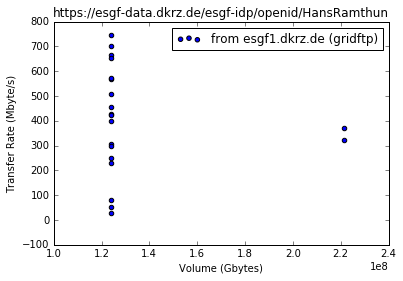

User:  https://pcmdi.llnl.gov/esgf-idp/openid/kbtest


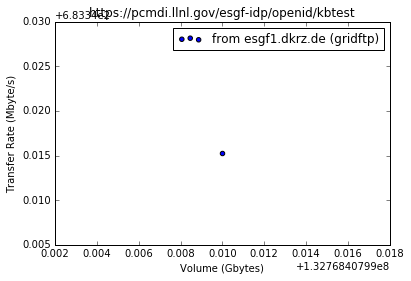

User:  https://esgf-data.dkrz.de/esgf-idp/openid/stephank16


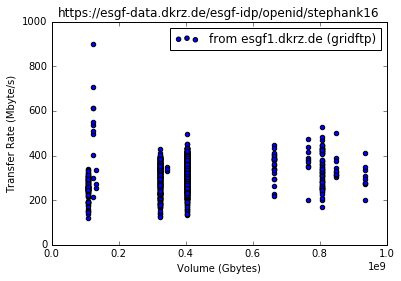

User:  STFC


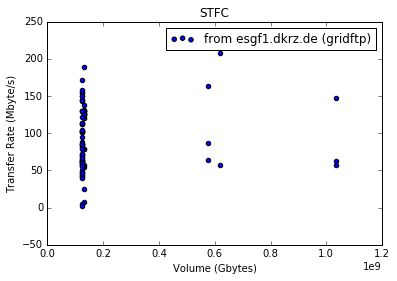

User:  https://esgf-data.dkrz.de/esgf-idp/openid/lukasz


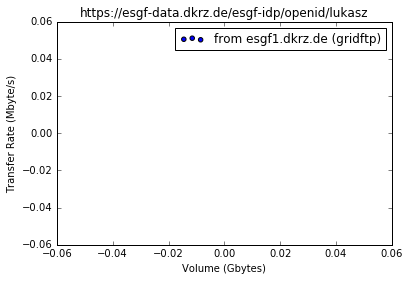

User:  https://esgf-node.ipsl.upmc.fr/esgf-idp/openid/kbtest


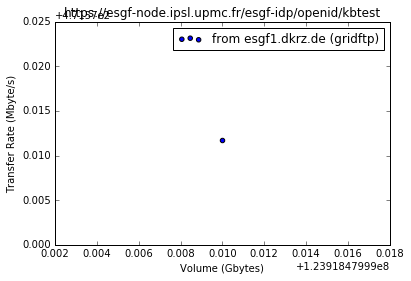

User:  https://esgf-node.ipsl.upmc.fr/esgf-idp/openid/syndatest_ipsl


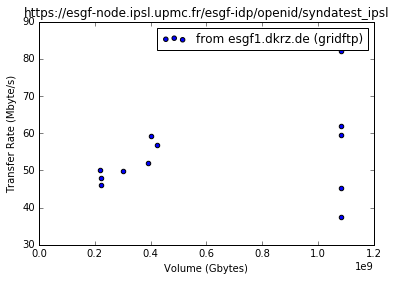

User:  https://esgf-data.dkrz.de/esgf-idp/openid/alaniwi


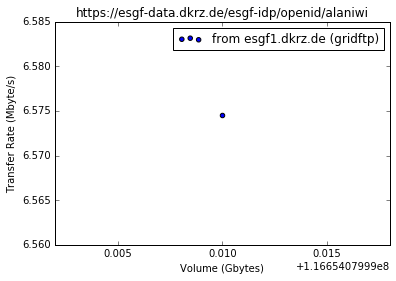

User:  https://pcmdi.llnl.gov/esgf-idp/openid/syndatest


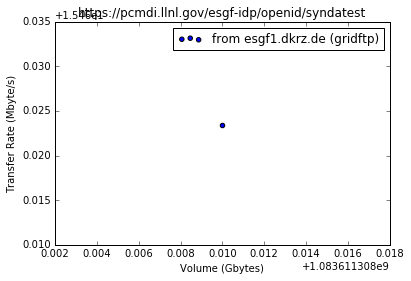

User:  https://esgf-data.dkrz.de/esgf-idp/openid/kbtest11


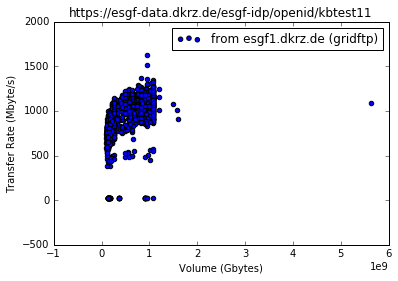

User:  https://pcmdi.llnl.gov/esgf-idp/openid/matt_pritchard_pcmdi


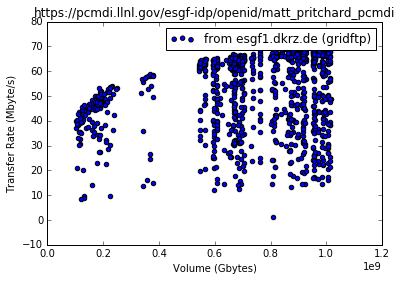

User:  https://pcmdi.llnl.gov/esgf-idp/openid/elidart


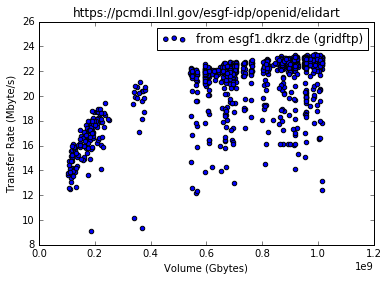

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

for user in user_openids:
   print "User: ",user
   plt.scatter(volumes[user],transfer_rates[user],label='from esgf1.dkrz.de (gridftp)')
   plt.xlabel('Volume (Gbytes)')
   plt.ylabel('Transfer Rate (Mbyte/s)') 
   plt.title(user)
   plt.legend()
   plt.show()

/home/stephan/.conda/envs/generic1/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/home/stephan/.conda/envs/generic1/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


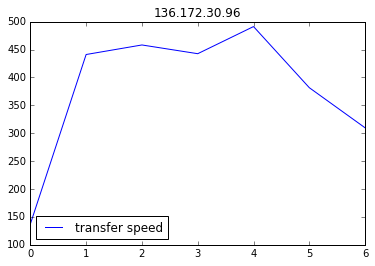

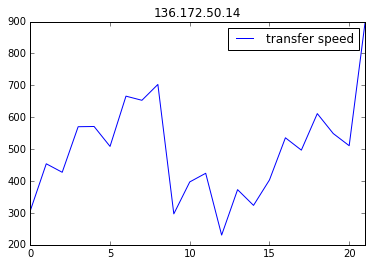

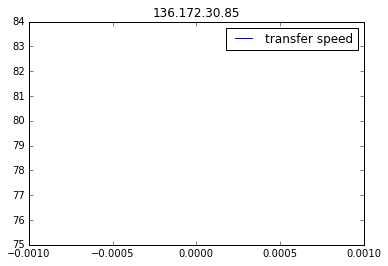

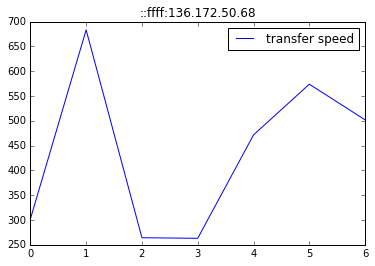

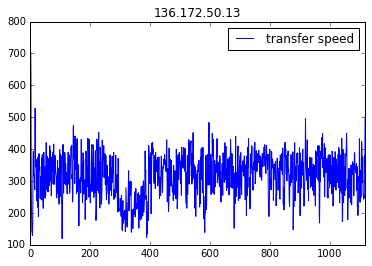

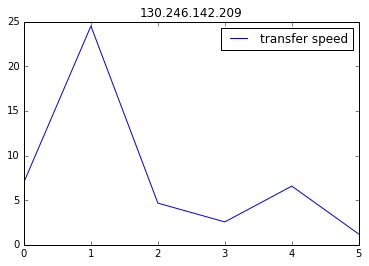

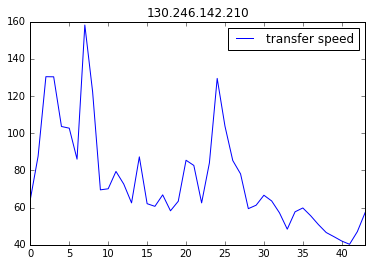

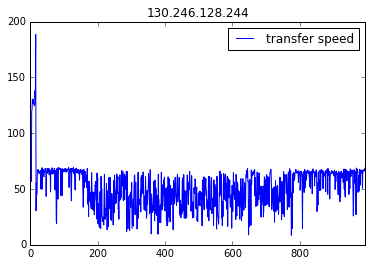

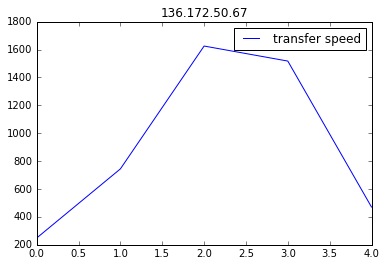

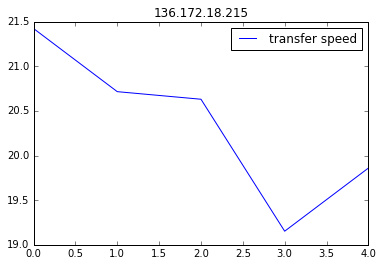

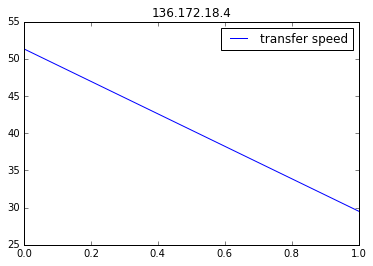

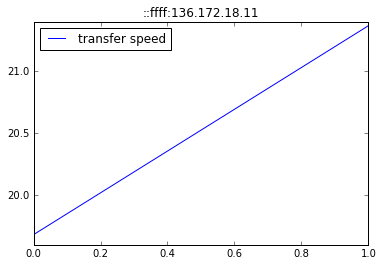

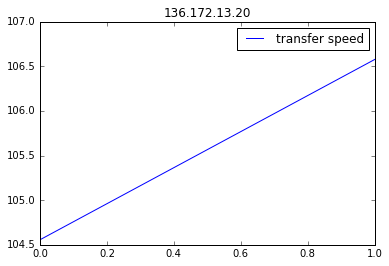

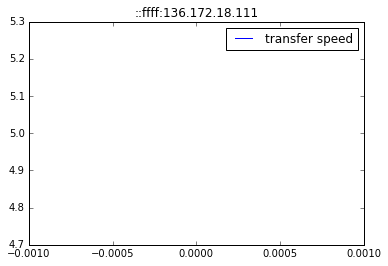

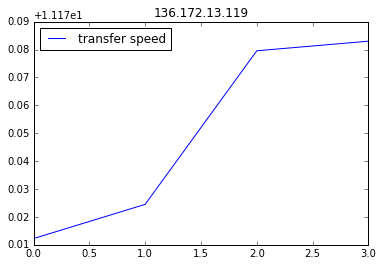

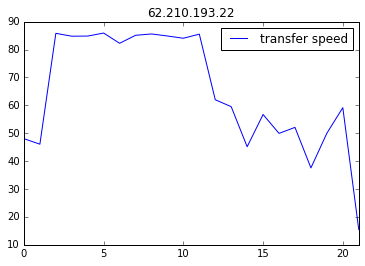

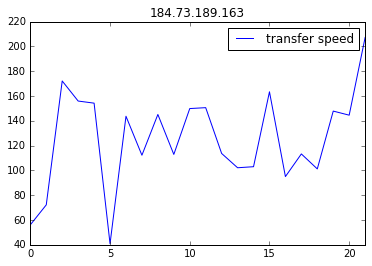

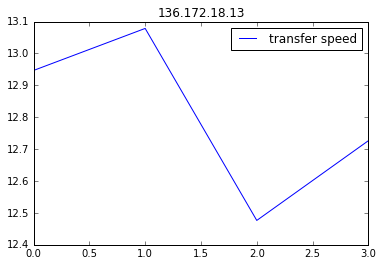

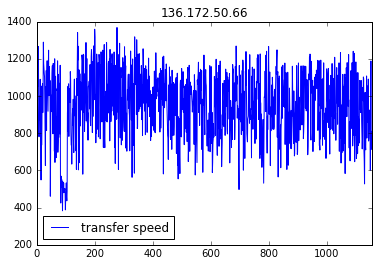

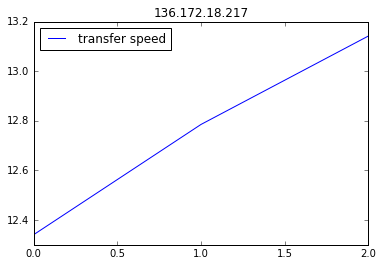

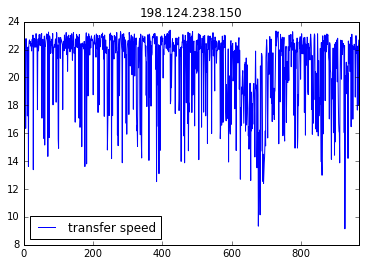

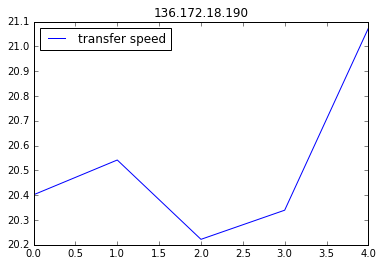

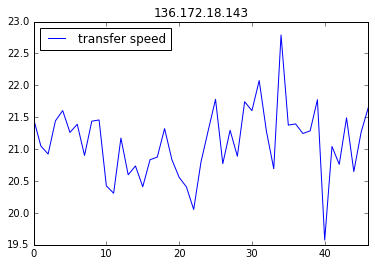

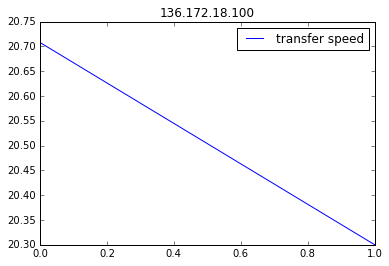

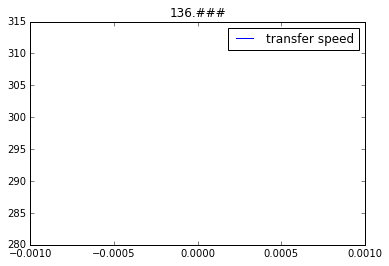

In [6]:
# attention: not ready .. just coarse look based on DataFrame visualization
# to be completed ...
import pandas
for user in client_ips:
  try:
        plot_df = pandas.DataFrame({'volume':volumes[user],'transfer speed':transfer_rates[user]})
        plot_df.plot(y='transfer speed',title=user)
  except:
    continue
#plot_df.plot(kind='box')